## 特征提取

In [1]:
import os
os.chdir('/home/haoying/A-journey-into-Convolutional-Neural-Network-visualization-')
from torchvision.models import *
from visualisation.core.utils import device
from visualisation.core.utils import module2traced
from efficientnet_pytorch import EfficientNet
import glob
import matplotlib.pyplot as plt
import numpy as np
import torch 
from utils import *
import PIL.Image
import cv2

from visualisation.core.utils import device 
from visualisation.core.utils import image_net_postprocessing
from visualisation.core.utils import image_net_preprocessing


from torchvision.transforms import ToTensor, Resize, Compose, ToPILImage
from visualisation.core import *

# for animation
%matplotlib inline
from IPython.display import Image
from matplotlib.animation import FuncAnimation
from collections import OrderedDict

In [2]:
def efficientnet(model_name='efficientnet-b0',**kwargs):
    return EfficientNet.from_pretrained(model_name).to(device)

In [64]:
df['rank'].unique().sort_values()

[1, 2, 3, 4, 5]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [127]:
image = [
    '/home/haoying/data_zl12/-48.251953125_-64.9607663214987.png','/home/haoying/data_zl12/-33.837890625_-61.81466389468391.png','/home/haoying/data_zl12/-28.388671875_-70.8734913192635.png','/home/haoying/data_zl12/-53.349609375_-66.79190947341796.png','/home/haoying/data_zl12/-26.982421875_-71.74643171904148.png',
    '/home/haoying/data_zl12/-59.150390625_-76.88077457250164.png','/home/haoying/data_zl12/-37.001953125_-68.23682270936281.png','/home/haoying/data_zl12/-57.12890625_-77.67412223173523.png','/home/haoying/data_zl12/-50.009765625_-77.73028235402455.png','/home/haoying/data_zl12/-53.96484375_-78.50807526258876.png',
    '/home/haoying/data_zl12/-53.525390625_-76.51681887717322.png','/home/haoying/data_zl12/-46.142578125_-75.23066741281572.png','/home/haoying/data_zl12/-36.9140625_-62.431074232920906.png','/home/haoying/data_zl12/-57.216796875_-77.11803181203175.png','/home/haoying/data_zl12/-27.509765625_-70.93100353239012.png',
    '/home/haoying/data_zl12/-52.998046875_-78.260332194717.png','/home/haoying/data_zl12/-55.458984375_-76.84081641443098.png','/home/haoying/data_zl12/-54.84375_-64.81155725022029.png','/home/haoying/data_zl12/-49.74609375_-76.24781659441473.png','/home/haoying/data_zl12/-54.755859375_-76.8207925254374.png',
    '/home/haoying/data_zl12/-61.69921875_-77.03941844273028.png','/home/haoying/data_zl12/-44.296875_-73.65254484149817.png','/home/haoying/data_zl12/-35.68359375_-74.75274618925877.png','/home/haoying/data_zl12/-34.892578125_-75.97355295343337.png','/home/haoying/data_zl12/-42.451171875_-60.3269477429984.png'
]

In [128]:
images = [PIL.Image.open(i) for i in image]

In [129]:
inputs  = [Compose([Resize((224,224)), ToTensor(), image_net_preprocessing])(x).unsqueeze(0) for x in images]  # add 1 dim for batch
inputs = [i.to(device) for i in inputs]

In [130]:
def tensor2img(tensor, ax=plt):
    tensor = tensor.squeeze()
    if len(tensor.shape) > 2: tensor = tensor.permute(1, 2, 0)
    img = tensor.detach().cpu().numpy()
    return img

In [131]:
model_outs = OrderedDict()
# model_instances = [lambda pretrained:efficientnet(model_name='efficientnet-b0')]

# model_names = [m.__name__ for m in model_instances]
# model_names[-1] = 'EB0'

images = list(map(lambda x: cv2.resize(np.array(x),(224,224)),images)) # resize i/p img

module = torch.load('/home/haoying/res_zl12_effnet_v3/res_pretrained.pt').to(device)
module.eval()

vis = GradCam(module, device)

model_outs = list(map(lambda x: tensor2img(vis(x, None,postprocessing=image_net_postprocessing)[0]), inputs))
del module
torch.cuda.empty_cache()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/home/haoying/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrain

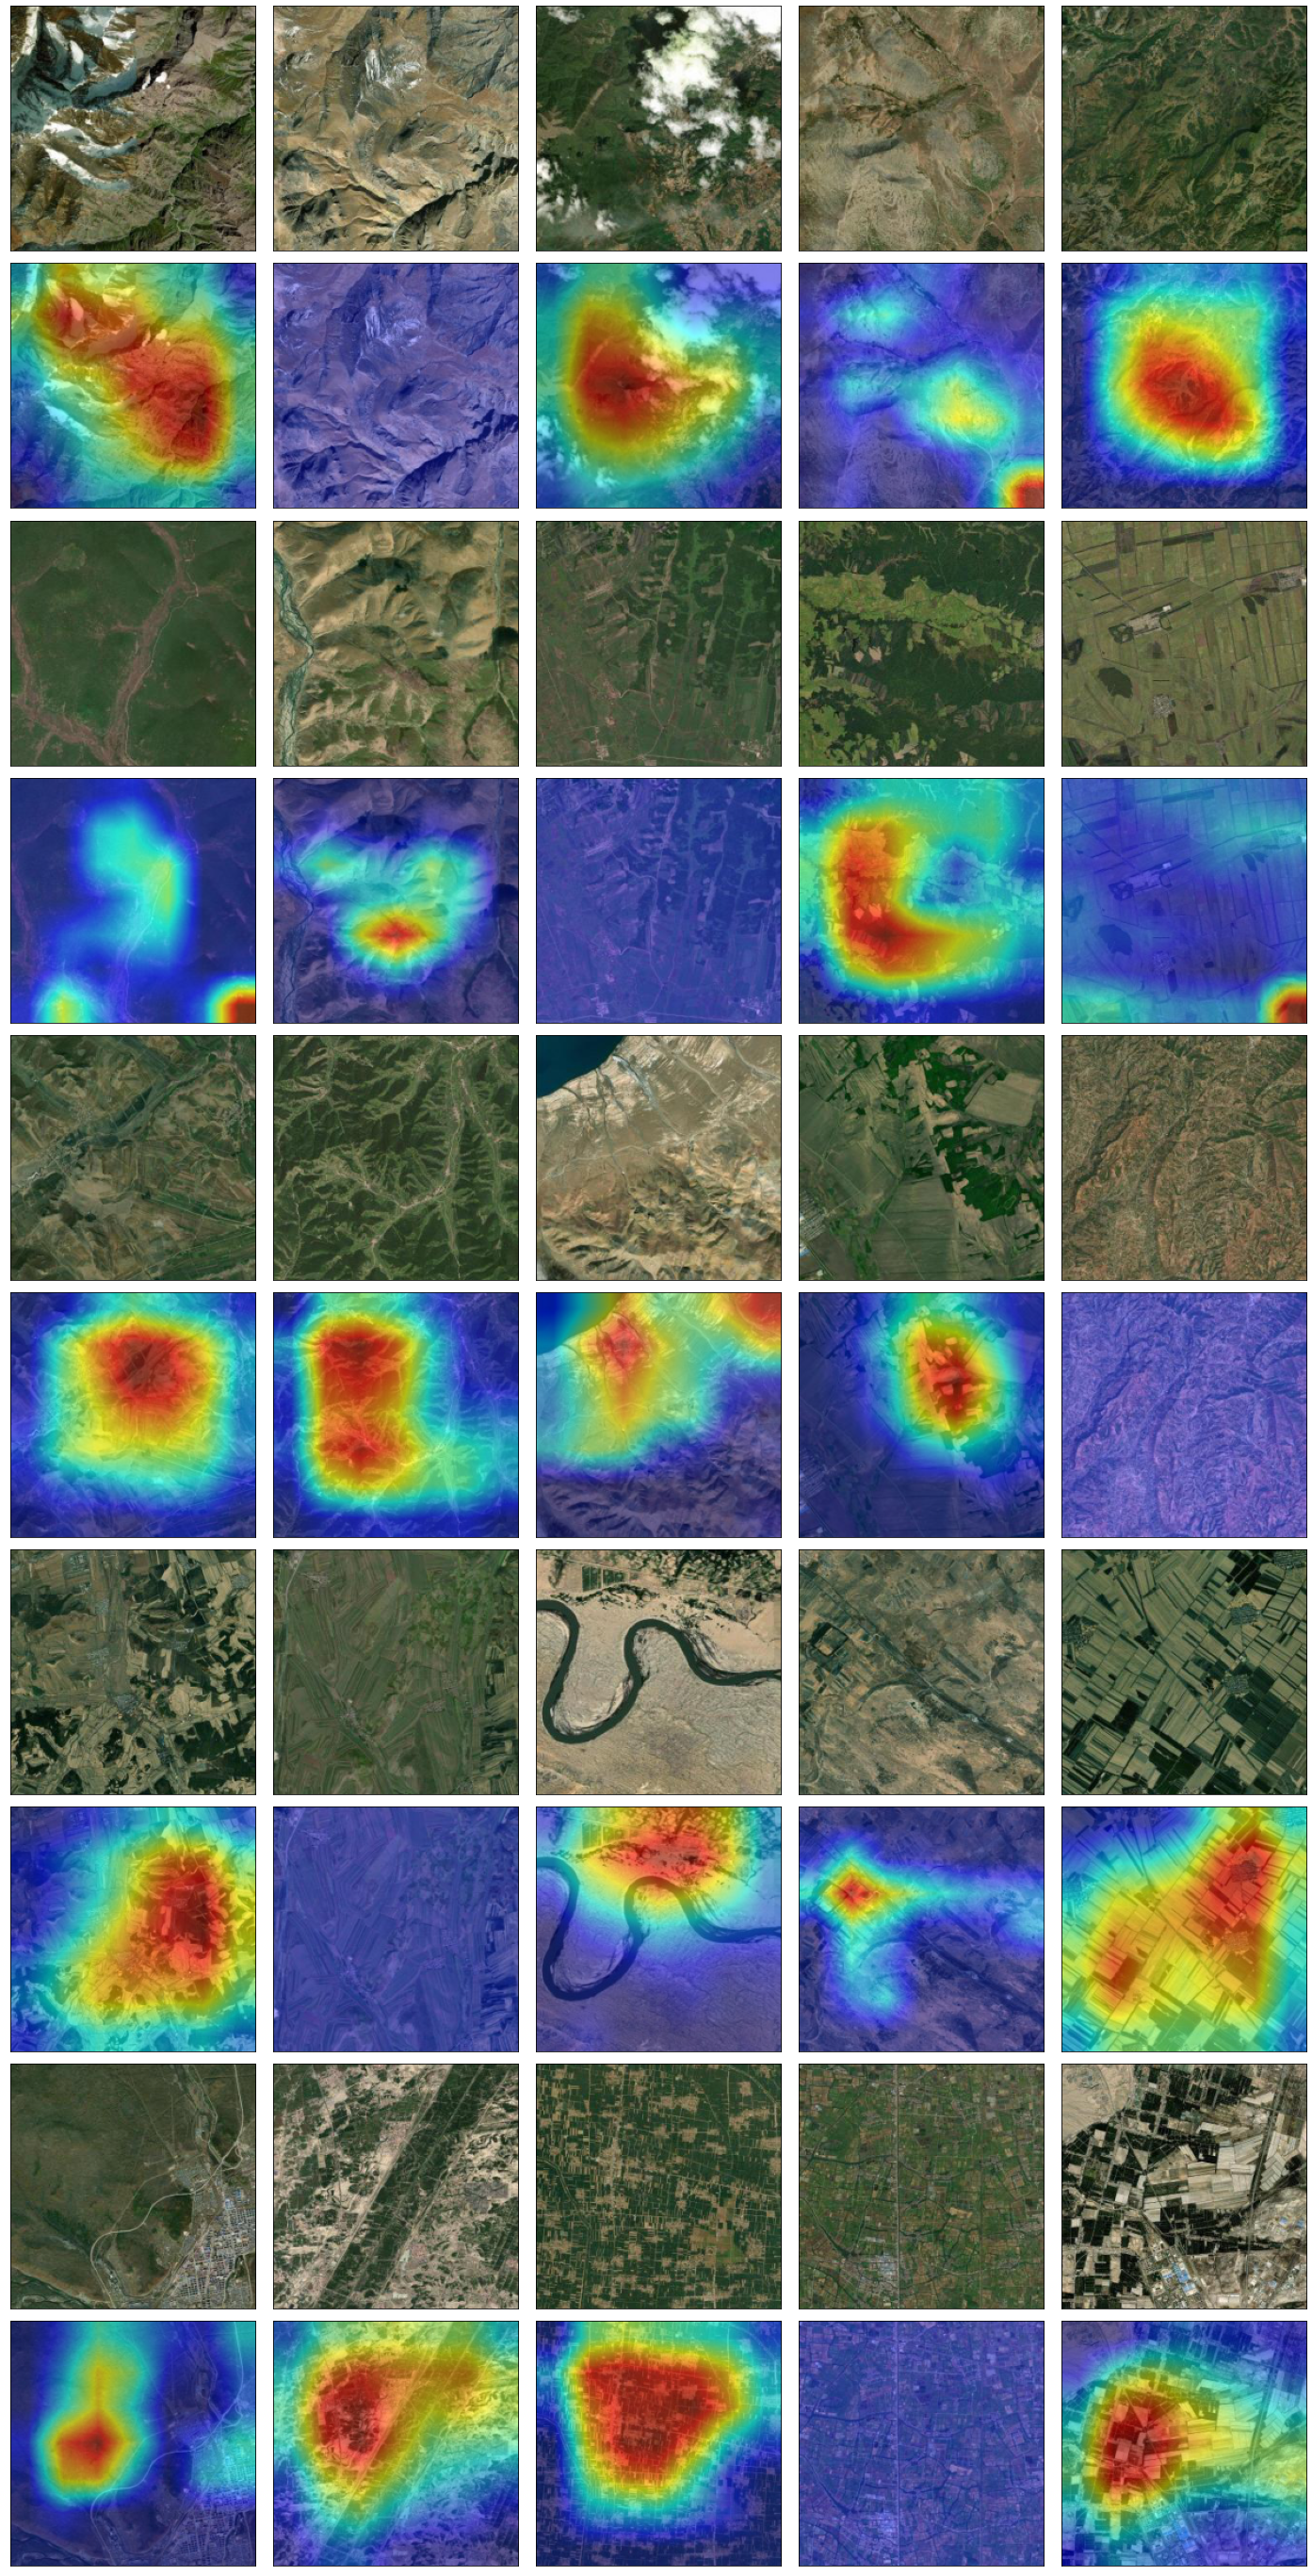

In [132]:
fig, ax = plt.subplots(10, 5,figsize=(25,50),constrained_layout=True)

for j in range(5):
    k = 2*j
    for i in range(5):
        ax[k,i].set_yticklabels([])
        ax[k,i].set_xticklabels([])
        ax[k+1,i].set_yticklabels([])
        ax[k+1,i].set_xticklabels([])
        ax[k,i].set_yticks([])
        ax[k,i].set_xticks([])
        ax[k+1,i].set_yticks([])
        ax[k+1,i].set_xticks([])
        
        ax[k,i].imshow(images[5*j+i])
        ax[k+1,i].imshow(model_outs[5*j+i])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0, hspace=0.05)
